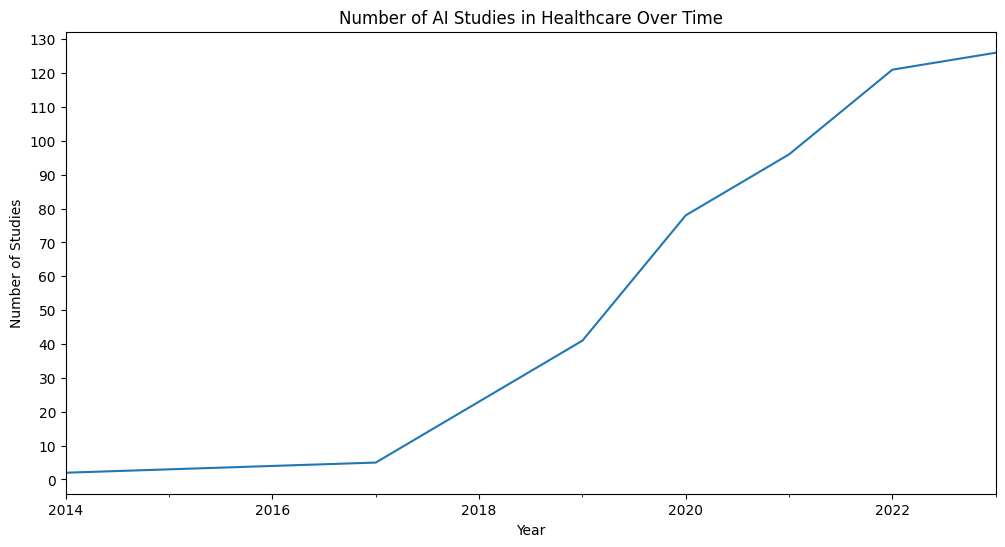

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data
data = pd.read_csv('preprocessed_clinical_trials_data.csv')

# Convert the "Study First Post Date" column to a DatetimeIndex
data['Study First Post Date'] = pd.to_datetime(data['Study First Post Date'])

# Set the "Study First Post Date" column as the index
data.set_index('Study First Post Date', inplace=True)

# Group the data by year and count the number of studies in each year
yearly_counts = data.resample('Y').size()

# Calculate start and end years
start_year = yearly_counts.index.min().year
end_year = yearly_counts.index.max().year

# Plot the time series
plt.figure(figsize=(12, 6))
yearly_counts.plot(title='Number of AI Studies in Healthcare Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Studies')

# Set y-axis ticks
plt.yticks(range(0, max(yearly_counts.values) + 5, 10))

plt.show()

11:59:59 - cmdstanpy - INFO - Chain [1] start processing
11:59:59 - cmdstanpy - INFO - Chain [1] done processing
/Users/eteles/miniconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/eteles/miniconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


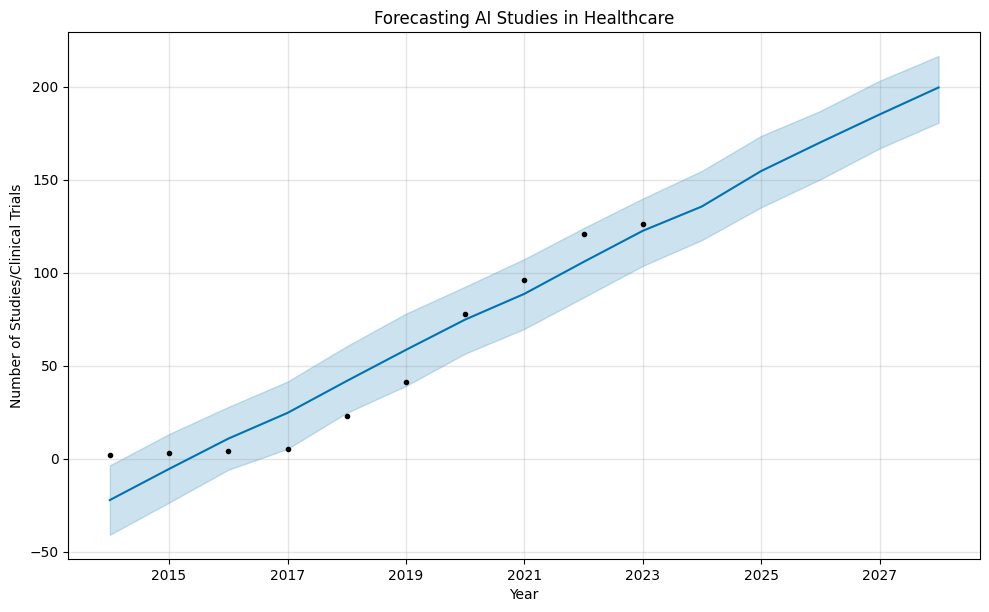

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the preprocessed data
data = pd.read_csv('preprocessed_clinical_trials_data.csv')

# Convert the "Study First Post Date" column to a DatetimeIndex
data['Study First Post Date'] = pd.to_datetime(data['Study First Post Date'])

# Group the data by year and count the number of studies in each year
yearly_counts = data.groupby(data['Study First Post Date'].dt.year).size().reset_index()
yearly_counts.columns = ['ds', 'y']  # Prophet expects columns named 'ds' for dates and 'y' for values

# Convert 'ds' column to datetime
yearly_counts['ds'] = pd.to_datetime(yearly_counts['ds'], format='%Y')

# Initialize and fit Prophet model
model = Prophet()
model.fit(yearly_counts)

# Create future dates for prediction
future = model.make_future_dataframe(periods=5, freq='Y')  # Change periods as needed for the number of forecasts

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasting AI Studies in Healthcare')
plt.xlabel('Year')
plt.ylabel('Number of Studies / Clinical Trials')
plt.show()
